In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
data = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\AnalyticsVidhya\\Loan-Disbursed\\train.csv",encoding="ISO-8859-1")
data.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [3]:
#remove the unwanted features
data = data.drop(['LoggedIn','Lead_Creation_Date'], axis=1)

### Checking Missing Values

In [4]:
df = pd.DataFrame({'Missing': data.isnull().sum(),
                   'type': data.dtypes})
print(df)

                       Missing     type
ID                           0   object
Gender                       0   object
City                      1003   object
Monthly_Income               0    int64
DOB                          0   object
Loan_Amount_Applied         71  float64
Loan_Tenure_Applied         71  float64
Existing_EMI                71  float64
Employer_Name               71   object
Salary_Account           11764   object
Mobile_Verified              0   object
Var5                         0    int64
Var1                         0   object
Loan_Amount_Submitted    34613  float64
Loan_Tenure_Submitted    34613  float64
Interest_Rate            59294  float64
Processing_Fee           59600  float64
EMI_Loan_Submitted       59294  float64
Filled_Form                  0   object
Device_Type                  0   object
Var2                         0   object
Source                       0   object
Var4                         0    int64
Disbursed                    0    int64


#### 1. Object Variables 

In [5]:
'''City, Employer_Name, Salary_Account'''
print("Number of unique values:")
print("City : %d" %(data.City.nunique()))
print("Employer : %d" %(data.Employer_Name.nunique()))
print("Bank : %d" %(data.Salary_Account.nunique()))

Number of unique values:
City : 697
Employer : 43567
Bank : 57


In [6]:
'''Since the unique values of these 3 features are too high, lets remove these from our data.'''
data.drop(['City','Employer_Name','Salary_Account'], axis=1, inplace=True)

#### 2. Numerical Features

##### Loan Amount Applied & Loan Tenure Applied

In [7]:
# since only 71 are missing, i will impute the median
amnt_app_median = data.Loan_Amount_Applied.median()
data['Loan_Amount_Applied'].fillna(amnt_app_median, inplace=True)

amnt_tenure_median = data.Loan_Tenure_Applied.median()
data['Loan_Tenure_Applied'].fillna(amnt_tenure_median, inplace=True)

#### Existing EMI

In [8]:
data.Existing_EMI.describe()

count    8.694900e+04
mean     3.696228e+03
std      3.981021e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.500000e+03
max      1.000000e+07
Name: Existing_EMI, dtype: float64

In [9]:
# 50% of the data is 0, so i will impute the median
data['Existing_EMI'].fillna(data['Existing_EMI'].median(), inplace=True)

### Data Preprocessing

#### Loan_Amount_Submitted, Loan_Tenure_Submitted and Interest_Rate

In [10]:
'''
For these features I will refer to Part 2: Statistical Analysis, hypothesis 10 where I created a new column 'loan_acquired' and 
with Anova testing I got a significant relationship.
So, I will preprocess these features according to that.
'''
data['loan_acquired'] = data.apply(lambda x: x['Loan_Amount_Submitted'] * (1 + (x['Loan_Tenure_Submitted'] * x['Interest_Rate'])), axis=1)

In [11]:
#Now if loan_acquired present, impute 1 else 0
data['loan_acquired'] = data['loan_acquired'].apply(lambda x: 1 if (x > 0) else 0)

In [12]:
#remove the unwanted features
data = data.drop(['Loan_Amount_Submitted','Loan_Tenure_Submitted','Interest_Rate','Processing_Fee','EMI_Loan_Submitted'], axis=1)

In [13]:
#checking Null values again
data.isnull().sum()

ID                     0
Gender                 0
Monthly_Income         0
DOB                    0
Loan_Amount_Applied    0
Loan_Tenure_Applied    0
Existing_EMI           0
Mobile_Verified        0
Var5                   0
Var1                   0
Filled_Form            0
Device_Type            0
Var2                   0
Source                 0
Var4                   0
Disbursed              0
loan_acquired          0
dtype: int64

#### Existing EMI

In [14]:
'''If existing emi is present, impute 1 else 0'''

data['Existing_EMI'] = data['Existing_EMI'].apply(lambda x: 0 if (x==0) else 1)

#### Monthly_Income

In [15]:
'''As per hypothesis 1, Monthly_income will be divided into 3 parts.'''
data['monthly_income_bins'] = pd.cut(data['Monthly_Income'], bins=[-1,1.650000e+04,4.000000e+04,5.000000e+08], labels=['low','med','high'])

#### Loan_amount_applied

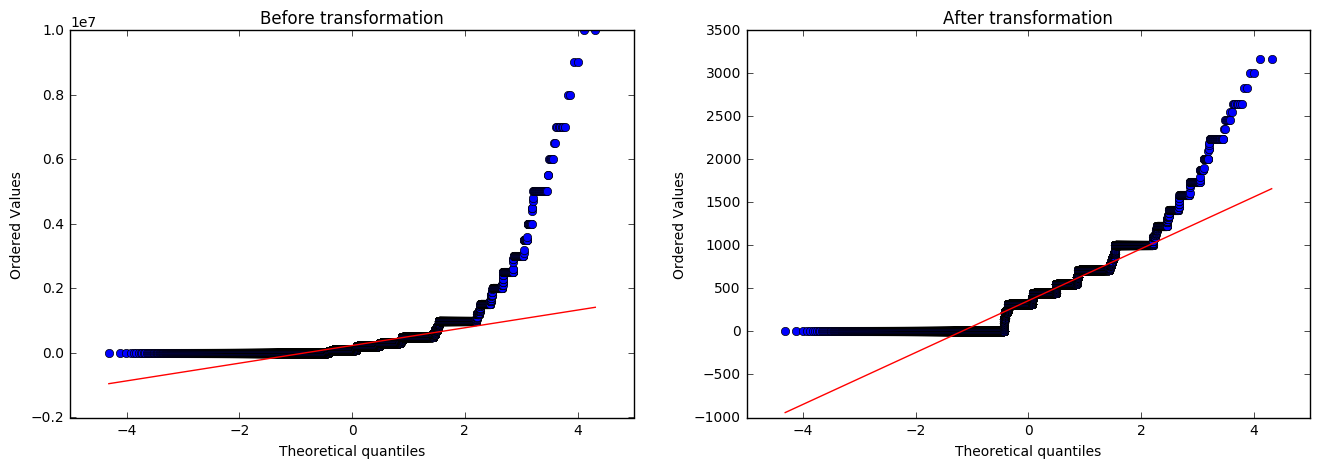

In [16]:
fig=plt.figure(figsize=[16,5])
ax1 = fig.add_subplot(121)
xt = (data.Loan_Amount_Applied)
stats.probplot(xt, dist=stats.norm, plot=ax1)
plt.title('Before transformation')


ax2 = fig.add_subplot(122)
xt1 = np.sqrt(data.Loan_Amount_Applied)
stats.probplot(xt1, dist=stats.norm, plot=ax2)
plt.title('After transformation')
plt.show()

In [17]:
#sqrt transformed values seems much okay than the original values
data['Loan_Amount_Applied'] = np.sqrt(data['Loan_Amount_Applied'])

#### Source

In [18]:
data.Source.value_counts()

S122    38567
S133    29885
S159     5599
S143     4332
S127     1931
S137     1724
S134     1301
S161      769
S151      720
S157      650
S153      494
S156      308
S144      299
S158      208
S123       73
S141       57
S162       36
S124       24
S160       11
S150       10
S155        4
S138        3
S129        3
S139        3
S136        3
S135        2
S140        1
S130        1
S125        1
S154        1
Name: Source, dtype: int64

In [19]:
# S122, S133 has got the maximum counts andthe remaining sources are much lesser. So I will keep S122 and S133 as it is, then 
#combine the remaining to form 1 type.
data['Source'] = data['Source'].apply(lambda x: 'other' if x not in ['S122','S133'] else x)

#### DOB

In [20]:
#create a new column with the age of every customer
data['Age'] = data['DOB'].apply(lambda x: 117 - int(x[-2:]))

In [21]:
data.head()

,ID,Gender,Monthly_Income,DOB,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Mobile_Verified,Var5,Var1,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,loan_acquired,monthly_income_bins,Age
0,ID000002C20,Female,20000,23-May-78,547.722558,5.0,0,N,0,HBXX,N,Web-browser,G,S122,1,0,0,med,39
1,ID000004E40,Male,35000,07-Oct-85,447.213595,2.0,0,Y,13,HBXA,N,Web-browser,G,S122,3,0,1,med,32
2,ID000007H20,Male,22500,10-Oct-81,774.596669,4.0,0,Y,0,HBXX,N,Web-browser,B,other,1,0,0,med,36
3,ID000008I30,Male,35000,30-Nov-87,1000.000000,5.0,0,Y,10,HBXX,N,Web-browser,B,other,3,0,0,med,30
4,ID000009J40,Male,100000,17-Feb-84,707.106781,2.0,1,Y,17,HBXX,N,Web-browser,B,other,3,0,0,high,33


In [22]:
#remove old variables
data.drop(['ID','DOB','Monthly_Income'],axis=1, inplace=True)

In [23]:
data.head()

,Gender,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Mobile_Verified,Var5,Var1,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,loan_acquired,monthly_income_bins,Age
0,Female,547.722558,5.0,0,N,0,HBXX,N,Web-browser,G,S122,1,0,0,med,39
1,Male,447.213595,2.0,0,Y,13,HBXA,N,Web-browser,G,S122,3,0,1,med,32
2,Male,774.596669,4.0,0,Y,0,HBXX,N,Web-browser,B,other,1,0,0,med,36
3,Male,1000.000000,5.0,0,Y,10,HBXX,N,Web-browser,B,other,3,0,0,med,30
4,Male,707.106781,2.0,1,Y,17,HBXX,N,Web-browser,B,other,3,0,0,high,33


### Label encoder and One-Hot encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features = ['Gender','Mobile_Verified','Var1','Filled_Form','Device_Type','Var2','Source','monthly_income_bins']
for i in features:
    data[i] = le.fit_transform(data[i])

In [25]:
data = pd.get_dummies(data, columns=features)
data.columns

Index(['Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Existing_EMI', 'Var5',
       'Var4', 'Disbursed', 'loan_acquired', 'Age', 'Gender_0', 'Gender_1',
       'Mobile_Verified_0', 'Mobile_Verified_1', 'Var1_0', 'Var1_1', 'Var1_2',
       'Var1_3', 'Var1_4', 'Var1_5', 'Var1_6', 'Var1_7', 'Var1_8', 'Var1_9',
       'Var1_10', 'Var1_11', 'Var1_12', 'Var1_13', 'Var1_14', 'Var1_15',
       'Var1_16', 'Var1_17', 'Var1_18', 'Filled_Form_0', 'Filled_Form_1',
       'Device_Type_0', 'Device_Type_1', 'Var2_0', 'Var2_1', 'Var2_2',
       'Var2_3', 'Var2_4', 'Var2_5', 'Var2_6', 'Source_0', 'Source_1',
       'Source_2', 'monthly_income_bins_0', 'monthly_income_bins_1',
       'monthly_income_bins_2'],
      dtype='object')

In [26]:
# avoiding the dummy variable trap
data.drop(['Gender_0','Mobile_Verified_0','Var1_0','Filled_Form_0','Device_Type_0','Var2_0','Source_0','monthly_income_bins_0'],axis=1,inplace=True)

In [27]:
data.head()

,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Var5,Var4,Disbursed,loan_acquired,Age,Gender_1,Mobile_Verified_1,...,Var2_1,Var2_2,Var2_3,Var2_4,Var2_5,Var2_6,Source_1,Source_2,monthly_income_bins_1,monthly_income_bins_2
0,547.722558,5.0,0,0,1,0,0,39,0,0,...,0,0,0,0,0,1,0,0,0,1
1,447.213595,2.0,0,13,3,0,1,32,1,1,...,0,0,0,0,0,1,0,0,0,1
2,774.596669,4.0,0,0,1,0,0,36,1,1,...,1,0,0,0,0,0,0,1,0,1
3,1000.000000,5.0,0,10,3,0,0,30,1,1,...,1,0,0,0,0,0,0,1,0,1
4,707.106781,2.0,1,17,3,0,0,33,1,1,...,1,0,0,0,0,0,0,1,0,0


In [28]:
#save the modified dataset
data.to_csv('data_modified.csv',index=False)